In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
new_data = data.copy()
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


## Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [5]:
data.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
year = []
month = []
for i in data['Quarter']:
    year.append('19'+i[3:])
    if i[:2] == 'Q1':
        month.append('jan')
    elif i[:2] == 'Q2':
        month.append('apr')
    elif i[:2] == 'Q3':
        month.append('jul')
    else:
        month.append('oct')

data = data.copy()
data['year'] = year
data['month'] = month
data['t'] = range(1, len(data)+1)
data['t_squared'] = data['t']**2
data.head()

,Quarter,Sales,year,month,t,t_squared
0,Q1_86,1734.827000,1986,jan,1,1
1,Q2_86,2244.960999,1986,apr,2,4
2,Q3_86,2533.804993,1986,jul,3,9
3,Q4_86,2154.962997,1986,oct,4,16
4,Q1_87,1547.818996,1987,jan,5,25


In [7]:
data['year']= pd.to_datetime(data['year'])

## EDA

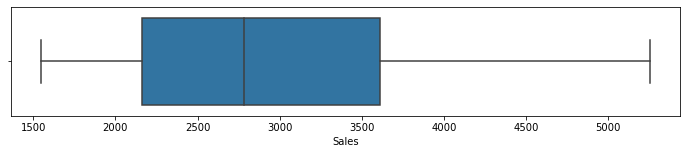

In [8]:
plt.figure(figsize = (12,2))
sns.boxplot(data["Sales"])
plt.show()

<AxesSubplot:xlabel='Sales', ylabel='Density'>

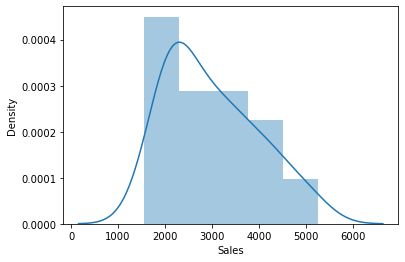

In [9]:
sns.distplot(data["Sales"])

## Model

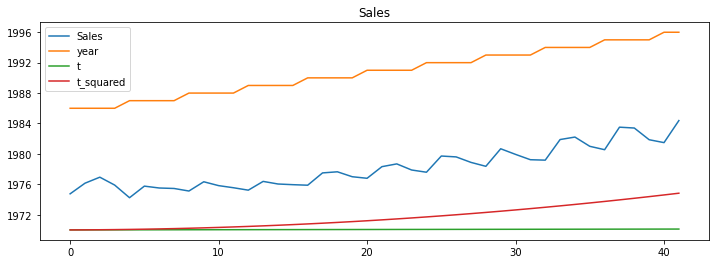

In [10]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Sales')
plt.show(block=False)

No missing values

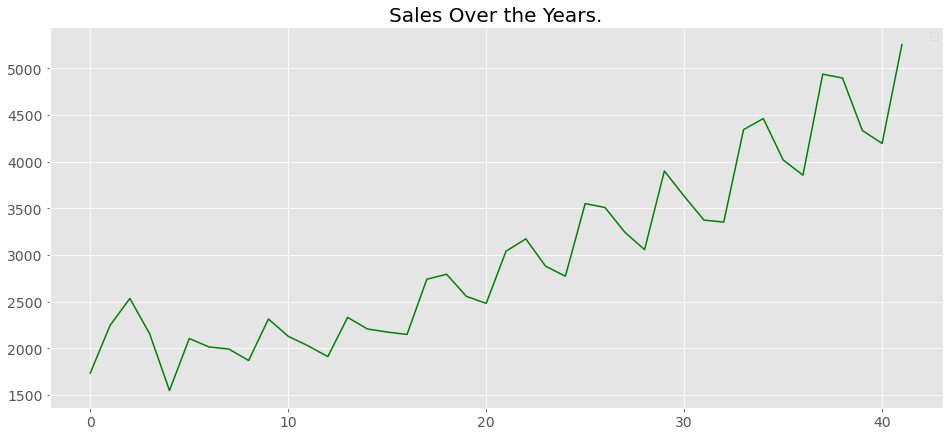

In [11]:
plt.style.use('ggplot')
plt.title("Sales Over the Years.",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels ='Sales', fontsize=14)
data['Sales'].plot(figsize=(16,7),c='g');

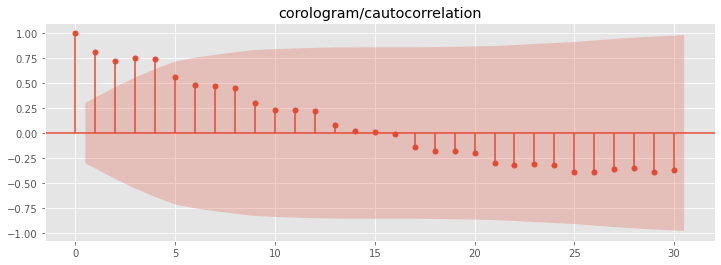

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data.Sales, ax=plt.gca(), lags = 30)
plt.title("corologram/cautocorrelation")
plt.show()

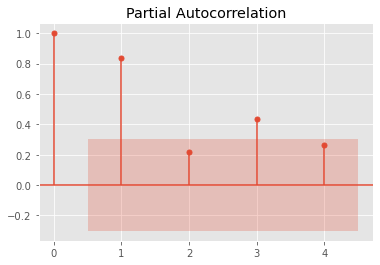

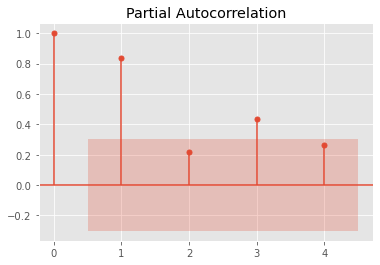

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['Sales'], lags = 4)

In [14]:
# import statsmodels.api as sm


# # graphs to show seasonal_decompose
# def seasonal_decompose (y):
#     decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative',extrapolate_trend='freq')
#     fig = decomposition.plot()
#     fig.set_size_inches(14,7)
#     plt.show()

In [15]:
data.columns

Index(['Quarter', 'Sales', 'year', 'month', 't', 't_squared'], dtype='object')

In [16]:
# changes = data.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')
# new_data['quater'] = pd.to_datetime(changes).dt.strftime('%b-%Y')
# new_data= new_data.drop(['Quarter'], axis=1)
# new_data.reset_index(inplace=True)
# new_data['quater'] = pd.to_datetime(new_data['quater'])
# new_data = data.set_index('quater')
# new_data.head()

## ARIMA

In [17]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels as sm
X = data['Sales'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

In [18]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -174.082
Date:                Sat, 24 Sep 2022   AIC                            360.163
Time:                        12:46:51   BIC                            367.712
Sample:                             0   HQIC                           362.337
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1024      0.306     -0.335      0.738      -0.702       0.497
ar.L2         -0.2140      0.160     -1.338      0.181      -0.527       0.099
ar.L3         -0.0892      0.191     -0.468      0.6

In [19]:
model_fit.forecast(1)

array([3130.13256295])

In [20]:
#Rolling Forecast Arima model
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs));

predicted=3130.132563, expected=3243.859993
predicted=3167.315970, expected=3056.000000
predicted=3717.472605, expected=3899.000000
predicted=3775.837494, expected=3629.000000
predicted=3332.735600, expected=3373.000000
predicted=3258.580396, expected=3352.000000
predicted=4081.006048, expected=4342.000000
predicted=3955.784548, expected=4461.000000
predicted=4146.277798, expected=4017.000000
predicted=3958.436348, expected=3854.000000
predicted=4701.652926, expected=4936.000000
predicted=4990.058081, expected=4895.000000
predicted=4390.352770, expected=4333.000000
predicted=4190.870203, expected=4194.000000
predicted=5176.884491, expected=5253.000000


C:\Users\Ashwini\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
error = mean_squared_error(test, predictions)
print(f"Test MSE:{error}")

Test MSE:34280.97034482113


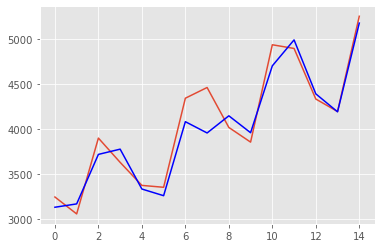

In [22]:
plt.plot(test)
plt.plot(predictions, color='b')
plt.show()

## Different Models

In [23]:
data

,Quarter,Sales,year,month,t,t_squared
0,Q1_86,1734.827000,1986-01-01,jan,1,1
1,Q2_86,2244.960999,1986-01-01,apr,2,4
2,Q3_86,2533.804993,1986-01-01,jul,3,9
3,Q4_86,2154.962997,1986-01-01,oct,4,16
4,Q1_87,1547.818996,1987-01-01,jan,5,25
5,Q2_87,2104.411995,1987-01-01,apr,6,36
6,Q3_87,2014.362999,1987-01-01,jul,7,49
7,Q4_87,1991.746998,1987-01-01,oct,8,64
8,Q1_88,1869.049999,1988-01-01,jan,9,81
9,Q2_88,2313.631996,1988-01-01,apr,10,100


In [24]:
data['Quarters'] = 0
data['Year'] = 0
for i in range(42):
    p = data["Quarter"][i]
    data['Quarters'][i]= p[0:2]
    data['Year'][i]= p[3:5]

In [25]:
# Getting dummy variables for Quarters Q1, Q2, Q3, Q4 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(data['Quarters']))
data = pd.concat([data,Quarters_Dummies],axis = 1)
data['log_sales'] =  np.log(data["Sales"])

In [26]:
model_data = data.drop(['year','month'],axis=1)
model_data

,Quarter,Sales,t,t_squared,Quarters,Year,Q1,Q2,Q3,Q4,log_sales
0,Q1_86,1734.827000,1,1,Q1,86,1,0,0,0,7.458663
1,Q2_86,2244.960999,2,4,Q2,86,0,1,0,0,7.716443
2,Q3_86,2533.804993,3,9,Q3,86,0,0,1,0,7.837477
3,Q4_86,2154.962997,4,16,Q4,86,0,0,0,1,7.675529
4,Q1_87,1547.818996,5,25,Q1,87,1,0,0,0,7.344602
5,Q2_87,2104.411995,6,36,Q2,87,0,1,0,0,7.651791
6,Q3_87,2014.362999,7,49,Q3,87,0,0,1,0,7.608058
7,Q4_87,1991.746998,8,64,Q4,87,0,0,0,1,7.596767
8,Q1_88,1869.049999,9,81,Q1,88,1,0,0,0,7.533186
9,Q2_88,2313.631996,10,100,Q2,88,0,1,0,0,7.746574


In [27]:
#splitting the data
Train, Test = model_data.head(32),model_data.tail(10)

In [28]:

#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
mape_linear = np.round(np.mean(np.abs(Test['Sales']-np.array(pred_linear))/Test['Sales'])*100,2)
print(f"rmse_linear:{rmse_linear},\nmape_linear:{mape_linear}")

rmse_linear:752.9233932767132,
mape_linear:13.7


In [29]:
#Quadratic 

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
mape_Quad = np.round(np.mean(np.abs(Test['Sales']-np.array(pred_Quad))/Test['Sales'])*100,2)
print(f"rmse_Quad:{rmse_Quad},\nmape_Quad:{mape_Quad}")

rmse_Quad:457.7357355407399,
mape_Quad:9.68


In [30]:
#Exponential

Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['log_sales'])-np.array(np.exp(pred_Exp)))**2))
mape_Exp = np.round(np.mean(np.abs(Test['Sales']-np.array(pred_Exp))/Test['Sales'])*100,2)
print(f"rmse_Exp:{rmse_Exp},\nmape_Exp:{mape_Exp}")

rmse_Exp:3954.313201255688,
mape_Exp:99.81


In [31]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
mape_add_sea = np.round(np.mean(np.abs(Test['Sales']-np.array(pred_add_sea))/Test['Sales'])*100,2)
print(f"rmse_add_sea:{rmse_add_sea},\nmape_add_sea:{mape_add_sea}")

rmse_add_sea:1850.466546185836,
mape_add_sea:41.24


In [32]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['t','t_squared','Q1','Q2','Q3']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
mape_add_sea_quad = np.round(np.mean(np.abs(Test['Sales']-np.array(pred_add_sea_quad))/Test['Sales'])*100,2)
print(f"rmse_add_sea_quad:{rmse_add_sea_quad},\nmape_add_sea_quad:{mape_add_sea_quad}")

rmse_add_sea_quad:277.351077112882,
mape_add_sea_quad:5.42


In [33]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test[['Q1','Q2','Q3']]))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['log_sales'])-np.array(np.exp(pred_Mult_sea)))**2))
mape_Mult_sea = np.round(np.mean(np.abs(Test['Sales']-np.array(pred_Mult_sea))/Test['Sales'])*100,2)
print(f"rmse_Mult_sea:{rmse_Mult_sea},\nmape_add_sea_quad:{mape_Mult_sea}")

rmse_Mult_sea:2495.3224714772045,
mape_add_sea_quad:99.82


In [34]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea  = pd.Series(Mul_Add_sea.predict(Test[['t','Q1','Q2','Q3']]))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['log_sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
mape_Mult_add_sea  = np.round(np.mean(np.abs(Test['Sales']-np.array(pred_Mult_add_sea))/Test['Sales'])*100,2)
print(f"rmse_Mult_add_sea:{rmse_Mult_add_sea},\nmape_Mult_add_sea :{mape_Mult_add_sea }")

rmse_Mult_add_sea:3947.098574401506,
mape_Mult_add_sea :99.81


In [35]:
#Compare the results 

data = {"MODEL":pd.Series(["linear","Exp","Quad","add_sea","add_sea_quad","Mult_sea","Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea]),"MAPE_Values":pd.Series([mape_linear,mape_Exp,mape_Quad,mape_add_sea,mape_add_sea_quad,mape_Mult_sea,mape_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values,MAPE_Values
4,add_sea_quad,277.351077,5.42
2,Quad,457.735736,9.68
0,linear,752.923393,13.70
3,add_sea,1850.466546,41.24
5,Mult_sea,2495.322471,99.82
6,Mult_add_sea,3947.098574,99.81
1,Exp,3954.313201,99.81


## Conslcusion:

Quadratic is giving godd MAPE Score. so we can use this model to predict the further data and also additive seasonality is giving goof RMSE score